In [ ]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# parameters
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', #경로
                          train=True, #train set
                          transform=transforms.ToTensor(), #0~1사이의 값
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, #test set
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          #섞는다
                                          drop_last = True)
                                          #남는 데이터는 사용하지 않느다)

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device) #10인 유는 Mnist 가 0~9사이이기 때문이다

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
linear = torch.nn.Linear(784, 10, bias=True).to(device) #device: device = 'cuda' else 'cpu'
#GPU에서 학습하고 저장된 모델을 GPU에서 불러올때는, 초기화된 모델에 model.to(torch.device('cuda')) 을
# CUDA 에 최적화 된 모델로 변환

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    X = X.view(-1,28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch
  print('Epoch: ', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished')

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader: #X: mnist 이미지, y, label불러오게된다 (0~9)
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device) #View를 이용해서 batch size 784로 바꿔본다.
        #(Batch size, 1, 28,28) => View (Batch size, 784)로 바꾼다음 X에 넣는다
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535899699
Epoch: 0002 cost = 0.359200507
Epoch: 0003 cost = 0.331210256
Epoch: 0004 cost = 0.316642880
Epoch: 0005 cost = 0.306912154
Epoch: 0006 cost = 0.300341636
Epoch: 0007 cost = 0.295203745
Epoch: 0008 cost = 0.290808439
Epoch: 0009 cost = 0.287419200
Epoch: 0010 cost = 0.284378767
Epoch: 0011 cost = 0.281997472
Epoch: 0012 cost = 0.279780537
Epoch: 0013 cost = 0.277854115
Epoch: 0014 cost = 0.276023209
Epoch: 0015 cost = 0.274494946
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy:  0.11100000143051147
Label:  3
Prediction:  9


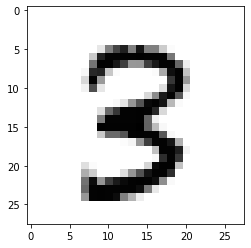

In [ ]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) ==Y_test
  accuracy = correct_prediction.float().mean()

  print('Accuracy: ', accuracy.item())

  r = random.randint(0, len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap="Greys", interpolation='nearest')
  plt.show()

Accuracy: 0.11100000143051147
Label:  5
Prediction:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


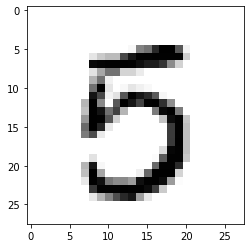

In [ ]:
# Test the model using test sets
with torch.no_grad(): #gradient 계산을 안하겠다
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()